In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigdatamart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [13]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df['Outlet_Size'].fillna(" ",inplace=True)

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
# Now we can see that there are no null values left by using the fillna function

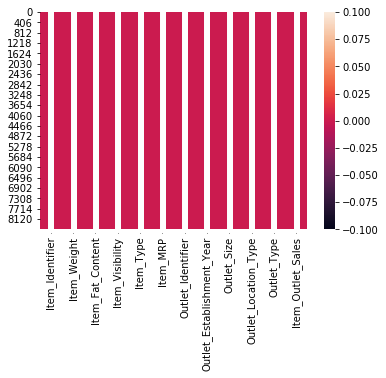

In [17]:
sns.heatmap(df.isnull(),annot=True)

In [18]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df1=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [23]:
df1['Item_Weight']=le.fit_transform(df1['Item_Weight'].astype('str'))
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content'].astype('str'))
df1['Item_Type']=le.fit_transform(df1['Item_Type'].astype('str'))
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'].astype('str'))
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'].astype('str'))
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type'].astype('str'))

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   int32  
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 466.2 KB


In [25]:
df1.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,407,1,0.016047,4,249.8092,1999,2,0,1,3735.1380
1,180,2,0.019278,14,48.2692,2009,2,2,2,443.4228
2,83,1,0.016760,10,141.6180,1999,2,0,1,2097.2700
3,100,2,0.000000,6,182.0950,1998,0,2,0,732.3800
4,388,1,0.000000,9,53.8614,1987,1,2,1,994.7052
5,4,2,0.000000,0,51.4008,2009,2,2,2,556.6088
6,41,2,0.012741,13,57.6588,1987,1,2,1,343.5528
7,33,1,0.127470,13,107.7622,1985,2,2,3,4022.7636
8,70,2,0.016687,5,96.9726,2002,0,1,1,1076.5986
9,100,2,0.094450,5,187.8214,2007,0,1,1,4710.5350


In [26]:
df1.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.006897,-0.014699,-0.016154,-0.019944,0.238987,-0.100979,-0.032864,-0.136424,-0.043937
Item_Fat_Content,-0.006897,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.008333,-0.004102,-0.004214,0.009800
Item_Visibility,-0.014699,0.034042,1.000000,-0.035249,-0.001315,-0.074834,-0.003108,-0.028099,-0.173468,-0.128625
Item_Type,-0.016154,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.002611,0.003084,0.003053,0.017048
Item_MRP,-0.019944,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.008320,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.238987,-0.000189,-0.074834,0.004970,0.005020,1.000000,-0.199485,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.100979,-0.008333,-0.003108,-0.002611,0.008320,-0.199485,1.000000,-0.385597,0.158755,0.057464
Outlet_Location_Type,-0.032864,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.385597,1.000000,0.467219,0.089367
Outlet_Type,-0.136424,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,0.158755,0.467219,1.000000,0.401522
Item_Outlet_Sales,-0.043937,0.009800,-0.128625,0.017048,0.567574,-0.049135,0.057464,0.089367,0.401522,1.000000


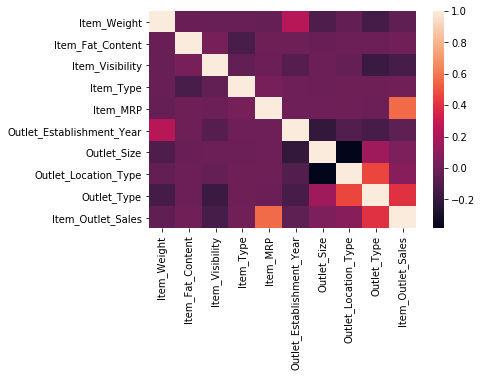

In [27]:
sns.heatmap(df1.corr())

In [28]:
#Here we can see that dark color boxes are less corelated and lite color boxes are highly coorelated to each other

In [29]:
df1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,121.776018,1.369354,0.066132,7.226681,140.992782,1997.831867,1.605303,1.112871,1.201220,2181.288914
std,121.168392,0.644810,0.051598,4.209990,62.275067,8.371760,1.168318,0.812757,0.796459,1706.499616
min,0.000000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,33.000000,1.000000,0.026989,4.000000,93.826500,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,75.000000,1.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,170.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,415.000000,4.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000,13086.964800


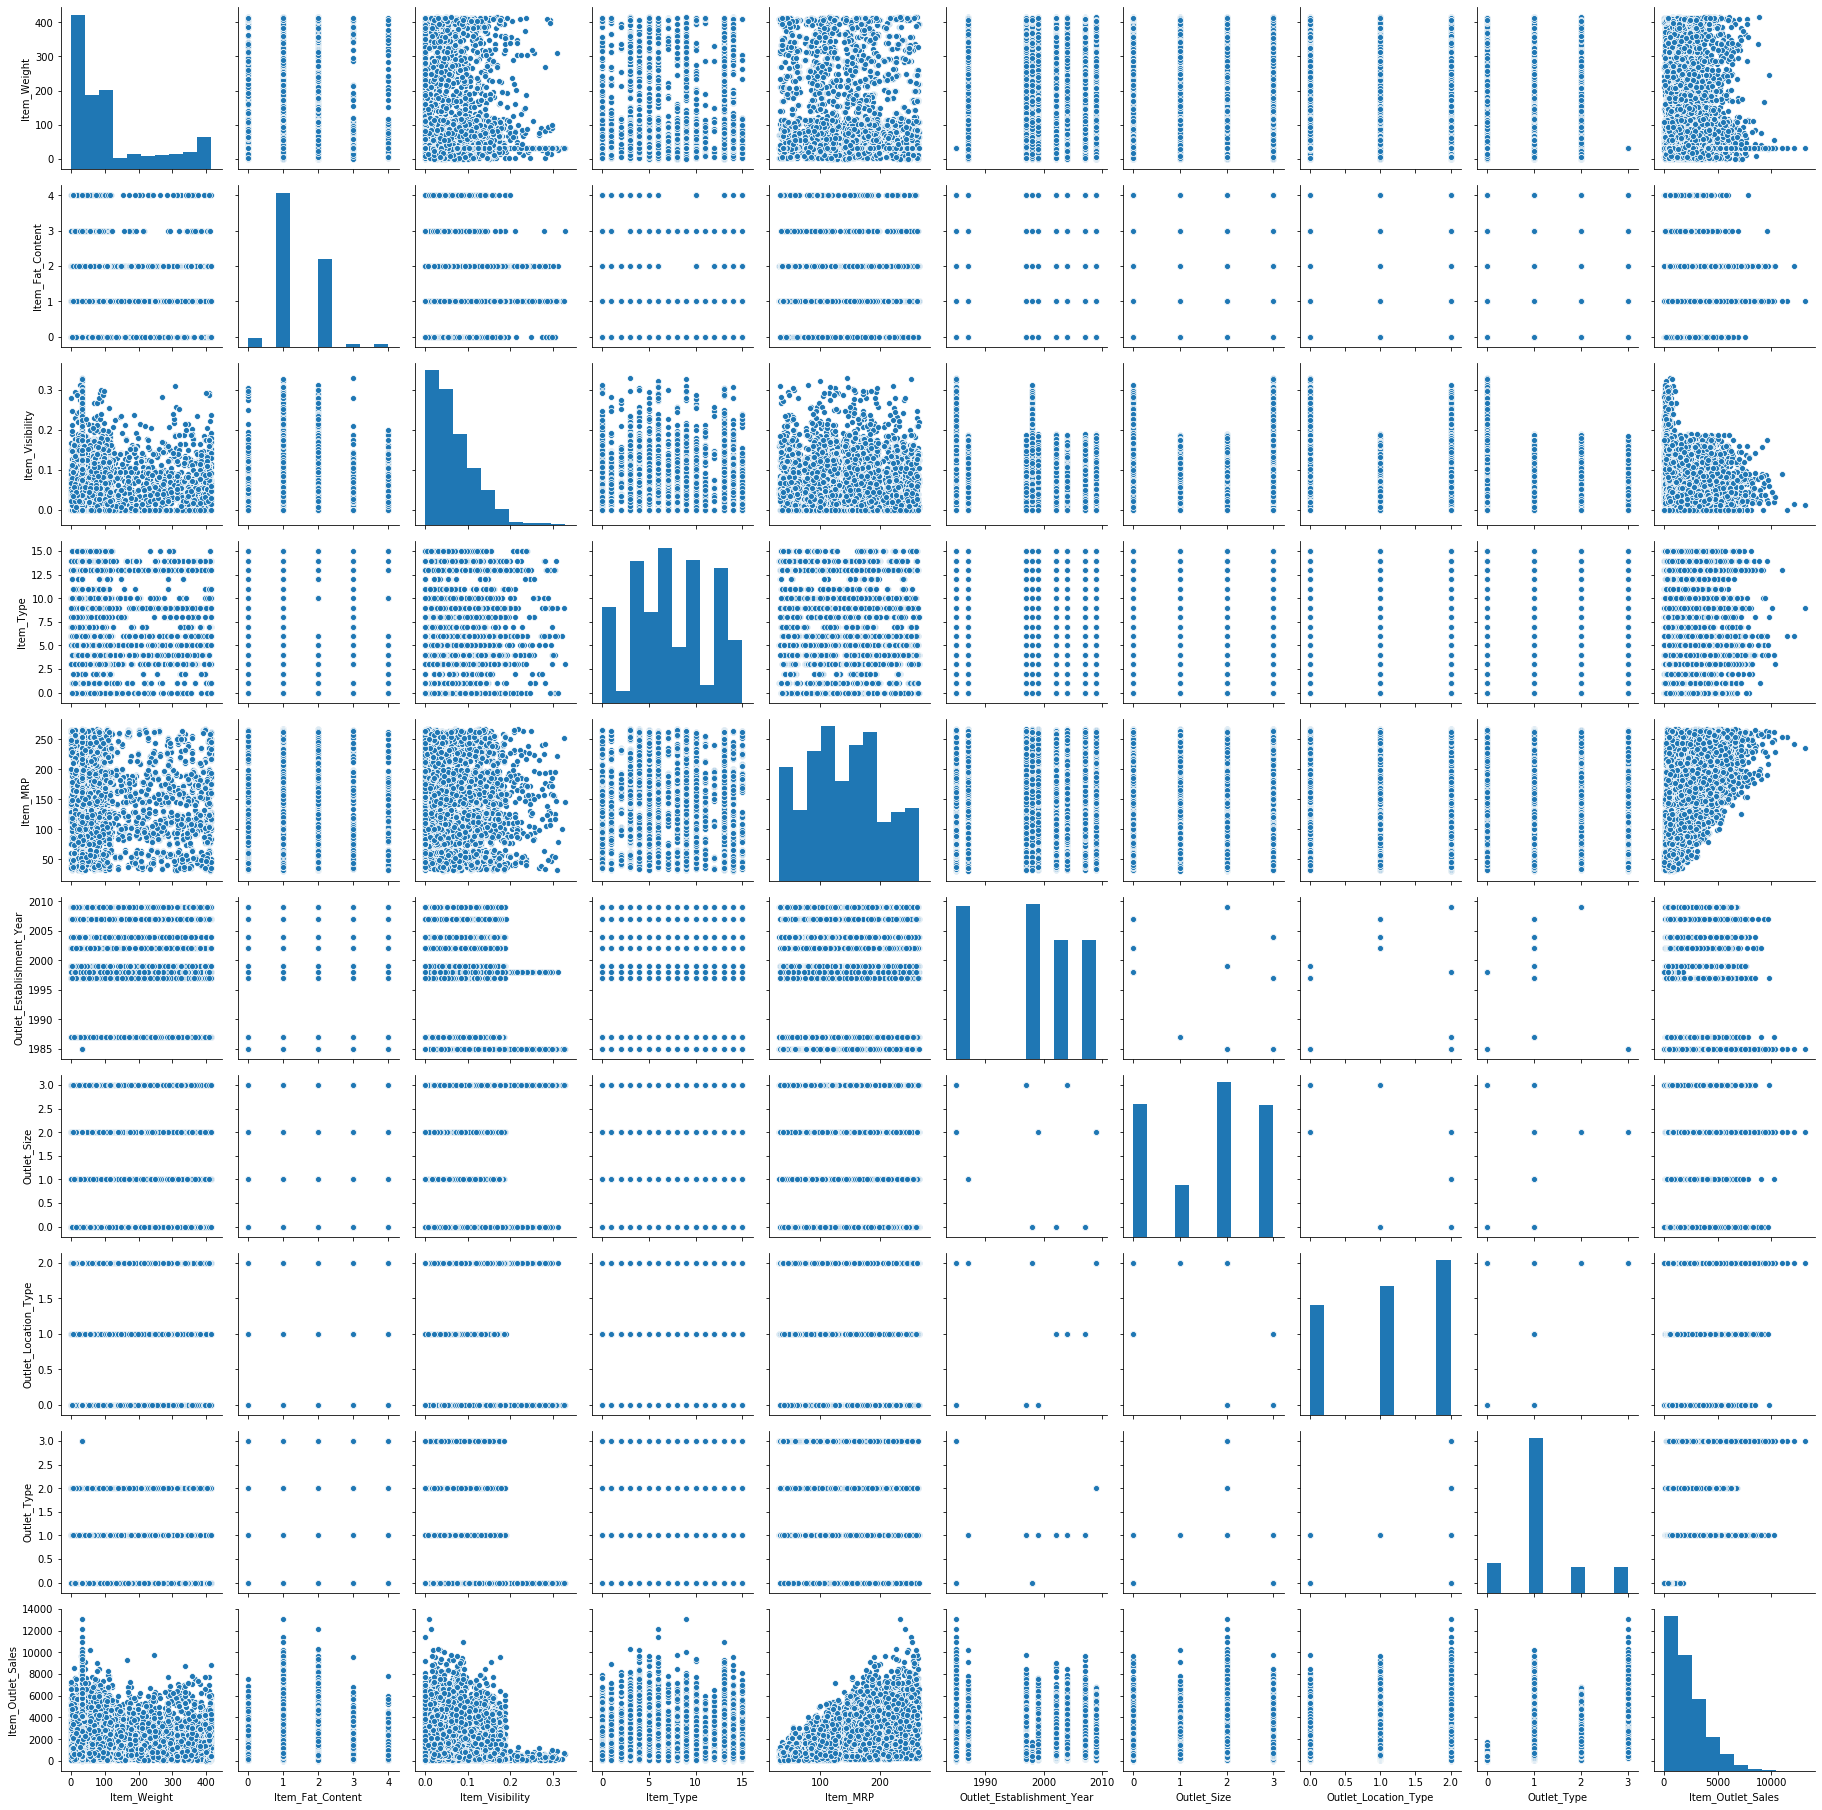

In [30]:
sns.pairplot(df1)

In [31]:
df1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

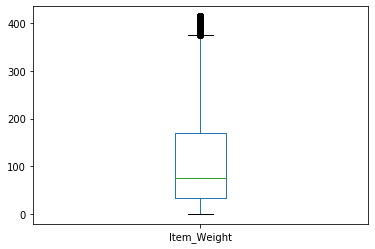

In [32]:
df1['Item_Weight'].plot.box()

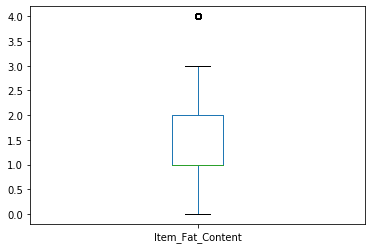

In [33]:
df1['Item_Fat_Content'].plot.box()

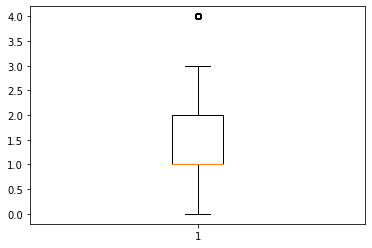

In [77]:
plt.boxplot(df1['Item_Fat_Content'])
plt.show()

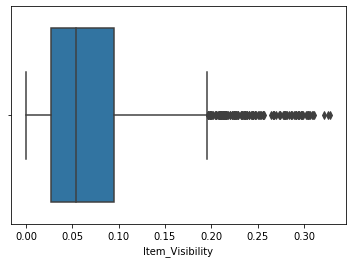

In [34]:
sns.boxplot(df1['Item_Visibility'])

In [35]:
# Here from diffrent boxplots we can see that there are many outliers available 

In [36]:
# To remove the outlier we have to use Zscore

In [37]:
from scipy.stats import zscore

In [38]:
z=np.abs(zscore(df1))
z

array([[2.35408517, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [0.4805494 , 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.32003637, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.95555291, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.23986786, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.55938676, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [39]:
threshold=3
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [40]:
z[49][2]

3.668255029958882

In [41]:
z[8517][1]

4.079963670566759

In [42]:
df_new=df1[(z<3).all(axis=1)]
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,407,1,0.016047,4,249.8092,1999,2,0,1,3735.1380
1,180,2,0.019278,14,48.2692,2009,2,2,2,443.4228
2,83,1,0.016760,10,141.6180,1999,2,0,1,2097.2700
3,100,2,0.000000,6,182.0950,1998,0,2,0,732.3800
4,388,1,0.000000,9,53.8614,1987,1,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,248,1,0.056783,13,214.5218,1987,1,2,1,2778.3834
8519,356,2,0.046982,0,108.1570,2002,0,1,1,549.2850
8520,6,1,0.035186,8,85.1224,2004,3,1,1,1193.1136
8521,272,2,0.145221,13,103.1332,2009,2,2,2,1845.5976


In [43]:
df1.shape

(8523, 10)

In [44]:
# Here we can observe that around 300 rows have been removed as outliers

In [45]:
x=df_new.iloc[:,0:9]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,407,1,0.016047,4,249.8092,1999,2,0,1
1,180,2,0.019278,14,48.2692,2009,2,2,2
2,83,1,0.016760,10,141.6180,1999,2,0,1
3,100,2,0.000000,6,182.0950,1998,0,2,0
4,388,1,0.000000,9,53.8614,1987,1,2,1
...,...,...,...,...,...,...,...,...,...
8518,248,1,0.056783,13,214.5218,1987,1,2,1
8519,356,2,0.046982,0,108.1570,2002,0,1,1
8520,6,1,0.035186,8,85.1224,2004,3,1,1
8521,272,2,0.145221,13,103.1332,2009,2,2,2


In [46]:
y=df_new.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model

In [48]:
max_r_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print("")
print('Max r2score corresponds to the',final_r_state,'is',max_r_score)


Max r2score corresponds to the 93 is 0.5172070400845227


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=93)

In [50]:
linr.fit(x_train,y_train)
linr.score(x_train,y_train)

0.4862528346984758

In [51]:
predlinr=linr.predict(x_test)

In [52]:
linr.coef_

array([ 2.97013719e-01,  3.24190970e+01, -1.23810929e+03, -1.44270631e-01,
        1.48746088e+01, -2.63956984e+00, -1.29289739e+02, -3.72277410e+02,
        9.69389097e+02])

In [53]:
linr.intercept_

4780.120744453825

In [54]:
print('R2-Score=',r2_score(y_test,predlinr))


R2-Score= 0.5172070400845227


In [55]:
print('r2-Score =',r2_score(y_test,predlinr))
print(mean_absolute_error(y_test,predlinr))
print(mean_squared_error(y_test,predlinr))
print('RMSE =',np.sqrt(mean_squared_error(y_test,predlinr)))

r2-Score = 0.5172070400845227
850.482342104562
1256474.6093943457
RMSE = 1120.9257822863856


In [56]:
x_train.shape

(6577, 9)

In [57]:
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1645, 9)
(6577,)
(1645,)


In [58]:
# HERE WE ARE USING RANDOM FOREST REGRESSOR

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf=RandomForestRegressor(n_estimators=200,random_state=93)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=93, verbose=0, warm_start=False)

In [61]:
rf.score(x_train,y_train)

0.935707876085119

In [62]:
predrf=rf.predict(x_test)

In [63]:
predrf

array([ 611.061253, 2162.841313, 2550.167134, ...,  601.280651,
       1424.921857, 1110.827378])

In [64]:
print(r2_score(y_test,predrf))

0.5639708909669086


In [65]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,predrf)))

RMSE: 1065.2563602105695


In [66]:
# NOW WE ARE TRYING USING REGULARISATION TECHNIQUES(LASSO & RIDGE)

In [67]:
from sklearn.linear_model import Lasso, Ridge

In [68]:
ls=Lasso(alpha=0.001)   # lASSO will try to reduce the coef to ZERO
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.48625283451091783

In [69]:
ls.coef_

array([ 2.97013327e-01,  3.24146170e+01, -1.23765532e+03, -1.44063885e-01,
        1.48746027e+01, -2.63938561e+00, -1.29287734e+02, -3.72274030e+02,
        9.69388864e+02])

In [70]:
rd=Ridge(alpha=0.001)   #RIDGE will try to minimize the coef variance
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.486252834691984

In [71]:
rd.coef_

array([ 2.97013834e-01,  3.24188104e+01, -1.23802362e+03, -1.44232198e-01,
        1.48746078e+01, -2.63954755e+00, -1.29289696e+02, -3.72277355e+02,
        9.69389472e+02])

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.48620617993825865

In [74]:
predenr=enr.predict(x_test)

In [75]:
enr.coef_

array([ 2.97172376e-01,  3.16456781e+01, -1.00880253e+03, -4.18002847e-02,
        1.48718054e+01, -2.57752641e+00, -1.29068545e+02, -3.71884377e+02,
        9.70093774e+02])